<a href="https://colab.research.google.com/github/Luke-687/Portfolio/blob/main/VelocityBasedChemotaxis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# General premise:
# Base around the idea of moving slowly in areas of highly concentrated positive chemicals, and quickly in areas without high concentrations of a given positive chemical
#Create a velocity function based around on pure calculation based on reward values, as well as some randomness to account for exploration
#Create a direction function, purely based around the premise of keep direction or change direction, change direction being completely random (direction defined by angle)
import math
import random
import matplotlib.pyplot as plt


def defineScene():
  x = []
  y = []
  color = []
  gradient = []
  reward = []
  #Consider 30x30 grid, source of chemical at (15,15) with a decrease in alpha by r^2
  for i in range (0,30):
    for j in range (0,30):
      x.append(j)
      y.append(i)
      #distance based calculations:
      distance = math.sqrt((i-15)**2+(j-15)**2)
      if(distance <= 8):
        color.append("green")
        if(not distance == 0):
          gradient.append(1/(distance**1.5))
          reward.append(10/(distance**1.5))
        else:
          gradient.append(1)
          reward.append(10)
      else:
        color.append("white")
        gradient.append(1)
        reward.append(-15)
  return x, y, color, gradient, reward
def calculate_velocity(posX, posY, rewards):
  posX = int(posX)
  posY = int(posY)
  currentReward = rewards[posX+posY*30]
  if(currentReward<0):
    velocity = 5
  else:
    velocity = 2.5/currentReward
  return velocity
def calculate_direction(pastR, currentR, currentDirection):
  if(pastR<currentR):
    return currentDirection
  elif(pastR==currentR):
    if(random.random()>0.5):
      return currentDirection+45
    else:
      return currentDirection-45
  else:
    return (currentDirection+ random.randint(90,270))

In [11]:
#Define the initial parameters
velocity = 7.5
direction = 45
currentX = 0
currentY= 0
stepsToBeMade = 50
xG, yG, colorG, gradient, reward = defineScene()

#Track x,y pos
x=[]
y=[]

for i in range(0, stepsToBeMade):
  #Enter and calculate reward of values which are about to be moved on from
  currentX = max(0, min(currentX, 29))
  currentY = max(0, min(currentY, 29))
  x.append(currentX)
  y.append(currentY)
  pastReward = reward[int(currentX+currentY*30)]

  #Find new position, and new current reward
  changeX = velocity * math.cos(direction*math.pi/180)
  changeY = velocity * math.sin(direction*math.pi/180)
  currentX = x[-1] + changeX
  currentY = y[-1] + changeY
  currentX = max(0, min(currentX, 29))
  currentY = max(0, min(currentY, 29))
  currentReward = reward[int(currentX+currentY*30)]

  #Redifine velocity and direction for next steps
  velocity = calculate_velocity(int(currentX), int(currentY), reward)
  direction = calculate_direction(pastReward, currentReward, direction)

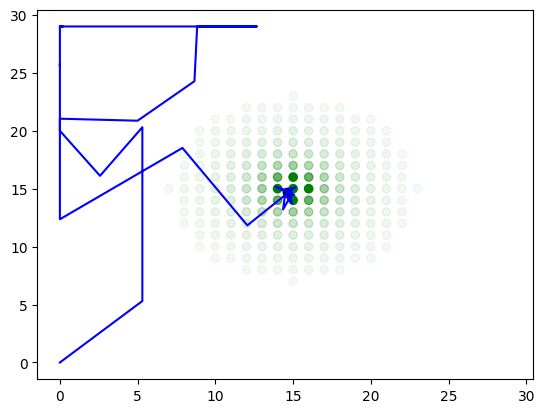

In [12]:
#Visualize

plt.scatter(xG, yG, color = colorG, alpha = gradient)
plt.plot(x,y, color = "blue")
plt.scatter(x[-1], y[-1], color = "black")
